In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from seaborn import heatmap
import os
from os import path

## Hypothesis analyzed
Terrorism activities have increased in the last years, in particoular <strong>starting from 2000's</strong>. <br>
Let's start by acquiring the data used:

In [39]:
data = pd.read_csv('globalterrorismdb_0718dist.csv', encoding='latin-1')

/home/manuelz/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (4,6,31,33,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [51]:
data.head(5)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,...,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197001000003,1970,1,0,NaN,0,NaN,101,Japan,4,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Now let's count the number of attacks registered for each year:

In [46]:
attacks_year = data.groupby(['iyear']).size().reset_index(name='counts')
attacks_year = attacks_year.rename(columns={'iyear': 'Year', 'counts': 'Number of attacks'})
attacks_year.tail(10)

,Year,Number of attacks
37,2008,4805
38,2009,4721
39,2010,4826
40,2011,5076
41,2012,8522
42,2013,12036
43,2014,16903
44,2015,14965
45,2016,13587
46,2017,10900


Let's check on a plot the trend of the number of attacks.

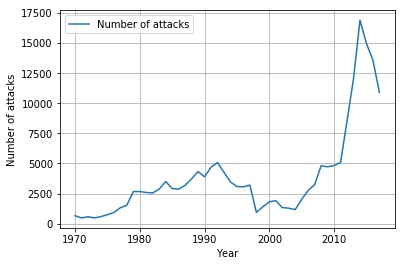

In [47]:
attacks_year.index = attacks_year['Year']
plt.plot(attacks_year['Number of attacks'], label='Number of attacks')
plt.xlabel('Year')
plt.ylabel('Number of attacks')
plt.legend()
plt.grid()
plt.show()

## Sub-hypothesis
Attacks <strong>harming citizens</strong> have increased since the forming of the ISIS group (1999). <br>
Let's filter the attacks taking into account only the ones aimed to private citizens and properties:

In [59]:
d2 = data[data['targtype1_txt'] == 'Private Citizens & Property']
citizens_attacks = d2.groupby(['iyear']).size().reset_index(name='counts')
citizens_attacks = citizens_attacks.rename(columns={'iyear': 'Year', 'counts': 'Number of attacks'})
citizens_attacks.head(10)

,Year,Number of attacks
0,1970,57
1,1971,23
2,1972,152
3,1973,127
4,1974,130
5,1975,135
6,1976,157
7,1977,223
8,1978,143
9,1979,387


### Worst 10 years
These are the top 10 years of attacks harming citizens.

In [76]:
citizens_attacks.sort_values(['Number of attacks'], ascending=False).head(10)

,Year,Number of attacks
Year,,
2016,2016,4370
2014,2014,4331
2015,2015,4184
2017,2017,2947
2013,2013,2492
2012,2012,1704
2009,2009,1671
2008,2008,1611
2010,2010,1477


Usual graphical representation:

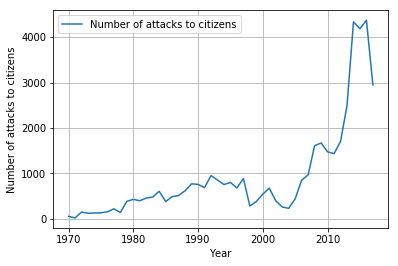

In [61]:
citizens_attacks.index = attacks_year['Year']
plt.plot(citizens_attacks['Number of attacks'], label='Number of attacks to citizens')
plt.xlabel('Year')
plt.ylabel('Number of attacks to citizens')
plt.legend()
plt.grid()
plt.show()